# Library

In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, Dataset, SequentialSampler
from torchsummary import summary
from torch import split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.nn import functional
from sklearn.preprocessing import MinMaxScaler
from torch.autograd import Variable


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Import

In [ ]:
df=pd.read_excel('drive/MyDrive/Input data/Data_kanghyunlee.xlsx')
df

,Unnamed: 0,Date,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,...,DAAA,DBAA,DPRIME,DGS3MO,DGS2,DGS10,WTICO,BCOM,LABEL(Vix27),LABEL(Z3)
0,0,2000-01-03,25.968750,26.562500,18.582453,28.843750,55.437500,22.750000,27.453125,30.296875,...,7.75,8.27,8.50,5.48,6.38,6.58,25.56,92.0451,0,0
1,1,2000-01-04,25.718750,26.062500,17.770105,28.046875,52.625000,22.109375,26.625000,29.609375,...,7.69,8.21,8.50,5.43,6.30,6.49,25.56,91.4952,1,1
2,2,2000-01-05,26.781250,26.750000,17.630484,27.921875,51.843750,22.500000,27.296875,29.343750,...,7.78,8.29,8.50,5.44,6.38,6.62,24.65,91.0023,0,1
3,3,2000-01-06,27.468750,27.781250,18.404753,28.296875,50.125000,22.921875,27.250000,29.437500,...,7.72,8.24,8.50,5.41,6.35,6.57,24.79,91.0400,0,1
4,4,2000-01-07,27.453125,28.078125,18.709383,29.375000,51.000000,24.375000,27.484375,29.796875,...,7.69,8.22,8.50,5.38,6.31,6.52,24.79,90.7495,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,5531,2021-12-27,89.639999,56.099998,39.220001,105.019997,176.649994,76.050003,70.059998,140.770004,...,2.73,3.34,3.25,0.06,0.76,1.48,75.49,100.3759,0,0
5532,5532,2021-12-28,90.160004,56.060001,39.240002,105.550003,175.729996,76.480003,70.690002,140.399994,...,2.71,3.35,3.25,0.06,0.74,1.49,76.01,100.0572,0,0
5533,5533,2021-12-29,90.529999,55.700001,39.189999,105.739998,175.880005,76.830002,71.070000,141.199997,...,2.70,3.40,3.25,0.05,0.75,1.55,76.58,100.1863,0,0
5534,5534,2021-12-30,90.209999,55.360001,39.119999,105.360001,174.720001,76.589996,71.330002,141.490005,...,2.71,3.37,3.25,0.05,0.73,1.52,76.83,99.4285,0,0


In [ ]:
df_date= df.set_index("Date")
df_date.head()

,Unnamed: 0,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,...,DAAA,DBAA,DPRIME,DGS3MO,DGS2,DGS10,WTICO,BCOM,LABEL(Vix27),LABEL(Z3)
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0,25.968750,26.562500,18.582453,28.843750,55.43750,22.750000,27.453125,30.296875,30.125000,...,7.75,8.27,8.5,5.48,6.38,6.58,25.56,92.0451,0,0
2000-01-04,1,25.718750,26.062500,17.770105,28.046875,52.62500,22.109375,26.625000,29.609375,29.218750,...,7.69,8.21,8.5,5.43,6.30,6.49,25.56,91.4952,1,1
2000-01-05,2,26.781250,26.750000,17.630484,27.921875,51.84375,22.500000,27.296875,29.343750,28.859375,...,7.78,8.29,8.5,5.44,6.38,6.62,24.65,91.0023,0,1
2000-01-06,3,27.468750,27.781250,18.404753,28.296875,50.12500,22.921875,27.250000,29.437500,29.187500,...,7.72,8.24,8.5,5.41,6.35,6.57,24.79,91.0400,0,1
2000-01-07,4,27.453125,28.078125,18.709383,29.375000,51.00000,24.375000,27.484375,29.796875,30.562500,...,7.69,8.22,8.5,5.38,6.31,6.52,24.79,90.7495,0,0


Z3 Labeling

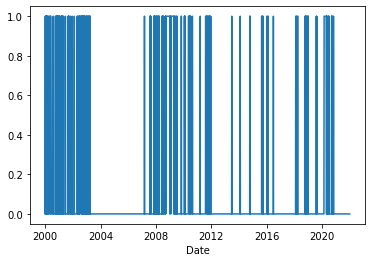

In [ ]:
plt.xlabel("Date")
plt.plot(df_date['LABEL(Z3)'])

VIX labeling

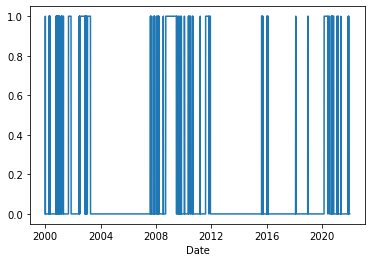

In [ ]:
plt.xlabel("Date")
plt.plot(df_date['LABEL(Vix27)'])

In [ ]:
df_VIX=df.iloc[:,1:26]
df_VIX.head()

,Date,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,...,EWJ,DAAA,DBAA,DPRIME,DGS3MO,DGS2,DGS10,WTICO,BCOM,LABEL(Vix27)
0,2000-01-03,25.968750,26.562500,18.582453,28.843750,55.43750,22.750000,27.453125,30.296875,30.125000,...,64.75,7.75,8.27,8.5,5.48,6.38,6.58,25.56,92.0451,0
1,2000-01-04,25.718750,26.062500,17.770105,28.046875,52.62500,22.109375,26.625000,29.609375,29.218750,...,63.00,7.69,8.21,8.5,5.43,6.30,6.49,25.56,91.4952,1
2,2000-01-05,26.781250,26.750000,17.630484,27.921875,51.84375,22.500000,27.296875,29.343750,28.859375,...,61.25,7.78,8.29,8.5,5.44,6.38,6.62,24.65,91.0023,0
3,2000-01-06,27.468750,27.781250,18.404753,28.296875,50.12500,22.921875,27.250000,29.437500,29.187500,...,58.75,7.72,8.24,8.5,5.41,6.35,6.57,24.79,91.0400,0
4,2000-01-07,27.453125,28.078125,18.709383,29.375000,51.00000,24.375000,27.484375,29.796875,30.562500,...,60.00,7.69,8.22,8.5,5.38,6.31,6.52,24.79,90.7495,0


In [ ]:
df_Z3=df.loc[:, df.columns!='LABEL(Vix27)']
df_Z3= df_Z3.iloc[:,1:]
df_Z3.head()

,Date,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,...,EWJ,DAAA,DBAA,DPRIME,DGS3MO,DGS2,DGS10,WTICO,BCOM,LABEL(Z3)
0,2000-01-03,25.968750,26.562500,18.582453,28.843750,55.43750,22.750000,27.453125,30.296875,30.125000,...,64.75,7.75,8.27,8.5,5.48,6.38,6.58,25.56,92.0451,0
1,2000-01-04,25.718750,26.062500,17.770105,28.046875,52.62500,22.109375,26.625000,29.609375,29.218750,...,63.00,7.69,8.21,8.5,5.43,6.30,6.49,25.56,91.4952,1
2,2000-01-05,26.781250,26.750000,17.630484,27.921875,51.84375,22.500000,27.296875,29.343750,28.859375,...,61.25,7.78,8.29,8.5,5.44,6.38,6.62,24.65,91.0023,1
3,2000-01-06,27.468750,27.781250,18.404753,28.296875,50.12500,22.921875,27.250000,29.437500,29.187500,...,58.75,7.72,8.24,8.5,5.41,6.35,6.57,24.79,91.0400,1
4,2000-01-07,27.453125,28.078125,18.709383,29.375000,51.00000,24.375000,27.484375,29.796875,30.562500,...,60.00,7.69,8.22,8.5,5.38,6.31,6.52,24.79,90.7495,0


In [ ]:
print(df_VIX.shape)
print(df_Z3.shape)

(5536, 25)
(5536, 25)


In [ ]:
df_numpy= df_Z3.iloc[:,1:].to_numpy()
df_numpy

array([[ 25.96875 ,  26.5625  ,  18.582453, ...,  25.56    ,  92.0451  ,
          0.      ],
       [ 25.71875 ,  26.0625  ,  17.770105, ...,  25.56    ,  91.4952  ,
          1.      ],
       [ 26.78125 ,  26.75    ,  17.630484, ...,  24.65    ,  91.0023  ,
          1.      ],
       ...,
       [ 90.529999,  55.700001,  39.189999, ...,  76.58    , 100.1863  ,
          0.      ],
       [ 90.209999,  55.360001,  39.119999, ...,  76.83    ,  99.4285  ,
          0.      ],
       [ 90.610001,  55.5     ,  39.049999, ...,  75.33    ,  99.1694  ,
          0.      ]])

In [ ]:
df_numpy.shape
df_numpy[:,:24].shape
df_numpy[:,23]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Creating features and targets

In [ ]:
features=df_numpy[:,:23]
targets= df_numpy[:,[23]]
print(targets.shape)
print(features.shape)

(5536, 1)
(5536, 23)


Standardizing Data

In [ ]:
from sklearn.preprocessing import StandardScaler
features_stand = StandardScaler().fit_transform(features)

In [ ]:
features_stand[:1]

array([[-0.88081723, -1.49545685, -0.38020692, -0.76416531,  0.40501239,
        -0.94631488, -0.91670939, -0.73823473, -0.71336763, -0.373094  ,
         0.48681063, -1.06318109,  1.2285795 , -0.00523863,  1.73305708,
         2.22207835,  1.71660707,  2.05611986,  2.2007362 ,  2.5831986 ,
         2.47924616, -1.38451278, -0.83643489]])

In [ ]:
features_stand = np.resize(features_stand, (1384,4,23))
features_stand.shape

(1384, 4, 23)

In [ ]:
targets_resize = np.resize(targets, (1384,4,1))
targets_resize.shape

(1384, 4, 1)

# Define Dataset Class
Splitting data as Training/ Test

In [ ]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        super(MyDataset, self).__init__()
        self.features = features if torch.is_tensor(features) else torch.from_numpy(features)
        self.labels = labels if torch.is_tensor(labels) else torch.from_numpy(labels)  
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]
    
    def __len__(self):
        return self.labels.size()[0]

    def split(self, val_split=0.8):
        train_size= round(val_split*len(self.features))
        train_data= self.features[:train_size,]
        train_label=self.labels[:train_size,]
        test_data= self.features[train_size:len(self.features),]
        test_label=self.labels[train_size:len(self.features),]
        return MyDataset(train_data,train_label), MyDataset(test_data,test_label)

In [ ]:
dataset_example = MyDataset(features_stand, labels=targets_resize)

# Splitting data as Training/ Test

In [ ]:
train_dataSet, test_dataSet = dataset_example.split()

In [ ]:
train_dataSet

In [ ]:
train_dataSet.__getitem__(0)[0].size()

torch.Size([4, 23])

In [ ]:
train_loader = DataLoader(train_dataSet, 24, shuffle=False)
x, y = next(iter(train_loader))
print(x.shape)
print(y.shape)

torch.Size([24, 4, 23])
torch.Size([24, 4, 1])


# RNN

In [ ]:
class RNN_Model(nn.Module):
    def __init__(self, input_dim,hidden_dim, output_size,  n_layers):
        super(RNN_Model, self).__init__()

        # Defining some parameters
        self.input_dim= input_dim
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size = self.input_dim, \
                          hidden_size = self.hidden_dim, \
                          num_layers = self.n_layers, \
                          bidirectional = False, \
                          batch_first=True)
        # linear  layer
        # Fully connected layer
        self.fc = nn.Linear(self.hidden_dim, output_size)

    
    def forward(self, x):
        
        batch_size = x.size(0)
        
        # Passing in the input and hidden state into the model and obtaining outputs
        rnn_out, hidden_out = self.rnn(x)
        #print(rnn_out.size(), hidden_out.size())
        #print(torch.flatten(rnn_out,0,1).shape)
       
        
        # run_out shape: [bacth_size, sequence length, hidden_dim]
        # Select which time step data you want for linear layers
        out = self.fc(torch.flatten(rnn_out,0,1))

        return out


In [ ]:
# Instantiate the model with hyperparameters
batch_size = 24
model = RNN_Model(input_dim=23, output_size=1, hidden_dim=10, n_layers=1)
# input dim: number of features in the model
# output_size: number of output in the model
# hidden_dim: number of rnn units in the model
# n_layers: number of stacks in the model 

- shape should be: **(seq_len, batch, input_size)**
- use **view()** method to manipulate ur  output to have 3d with this order (seq_len,batch, input_size)
- seq_len = time dimension (how many time steps do you have)
- batch = mini-batch dimension (how much do you split ur data)
- input_size = feature dimension (so how many features do you have)
- Example: So lets say you have some time series forecasting problem you split your data and you want to predict next 5 time steps using last 5 time steps number of features is 10 and u split ur data into batches of size 10 and total numbers of exaples = 1000.
Your input should have shape -> 5 x 100 x 10

In [ ]:
# Define a function to train the model 
def train_model(model, device, train_dataSet, test_dataSet, lr=0.0005, epochs=20, batch_size=24):
    
    # construct dataloader
    train_loader = DataLoader(train_dataSet, batch_size, shuffle=False)
    test_loader= DataLoader(test_dataSet, batch_size, shuffle=False)

    # move model to device
    model = model.to(device)
    model.float()
    # history
    history = {'train_loss': [],
               'train_acc': [],
               'test_loss': [],
               'test_acc': []}
    # setup loss function and optimizer
    optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()

    # training loop
    print('Training Start')
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_acc = 0
        test_loss = 0
        test_acc = 0

        for x, y in train_loader:
            # move data to device
            x = x.float()
            y = torch.flatten(y,0,1)
            x = x.to(device)
            y = y.to(device)
            # forward
            outputs = model(x)
            pred = torch.round(torch.sigmoid(outputs))
            cur_train_loss = criterion(outputs, y)
            cur_train_acc = (pred == y).sum().item() / y.shape[0]
            # backward
            cur_train_loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # loss and acc
            train_loss += cur_train_loss
            train_acc += cur_train_acc

        # test start
        model.eval()
        with torch.no_grad():
            for x, y in test_loader:
                # move
                x = x.float()
                y = torch.flatten(y,0,1)
                x = x.to(device)
                y = y.to(device)
                # predict
                outputs = model(x)
                pred = torch.round(torch.sigmoid(outputs))
                cur_test_loss = criterion(outputs, y)
                cur_test_acc = (pred == y).sum().item() / y.shape[0] 
                # loss and acc
                test_loss += cur_test_loss
                test_acc += cur_test_acc

        # epoch output
        train_loss = (train_loss/len(train_loader)).item()
        train_acc = train_acc/len(train_loader)
        val_loss = (test_loss/len(test_loader)).item()
        val_acc = test_acc/len(test_loader)
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['test_loss'].append(val_loss)
        history['test_acc'].append(val_acc)
        print(f"Epoch:{epoch + 1} / {epochs}, train loss:{train_loss:.5f} train_acc:{train_acc:.5f}, valid loss:{val_loss:.5f} valid acc:{val_acc:.5f}")
    
    return history

In [ ]:
history = train_model(model=model,
                      device=device,
                      train_dataSet=train_dataSet, 
                      test_dataSet=test_dataSet,
                      lr=0.005,
                      epochs=30,
                      batch_size=24)

Training Start
Epoch:1 / 30, train loss:0.29956 train_acc:0.89295, valid loss:1.15588 valid acc:0.43142
Epoch:2 / 30, train loss:0.20192 train_acc:0.91866, valid loss:0.32423 valid acc:0.86752
Epoch:3 / 30, train loss:0.18564 train_acc:0.91977, valid loss:0.48675 valid acc:0.79988
Epoch:4 / 30, train loss:0.17179 train_acc:0.92465, valid loss:0.43743 valid acc:0.82118
Epoch:5 / 30, train loss:0.16666 train_acc:0.92664, valid loss:0.44320 valid acc:0.82205
Epoch:6 / 30, train loss:0.16339 train_acc:0.92730, valid loss:0.43788 valid acc:0.82292
Epoch:7 / 30, train loss:0.16031 train_acc:0.92819, valid loss:0.43281 valid acc:0.82552
Epoch:8 / 30, train loss:0.15761 train_acc:0.92886, valid loss:0.42421 valid acc:0.82812
Epoch:9 / 30, train loss:0.15511 train_acc:0.93041, valid loss:0.41315 valid acc:0.83160
Epoch:10 / 30, train loss:0.15290 train_acc:0.93174, valid loss:0.40035 valid acc:0.83420
Epoch:11 / 30, train loss:0.15096 train_acc:0.93285, valid loss:0.38719 valid acc:0.84275
Epoc

In [ ]:
def get_result(model, dataloader):
    
    result = None
    
    model = model.to(device)
    model.eval()
    with torch.no_grad():
        for x, y in dataloader:
            # move
            x = x.float()
            y = torch.flatten(y,0,1)
            x = x.to(device)
            y = y.to(device)
            # predict
            outputs = model(x)
            pred = torch.round(torch.sigmoid(outputs))
            
            if result == None:
                result = pred
            else:
                result = torch.cat((result, pred))
            
    return result

# construct dataloader
train_loader = DataLoader(train_dataSet, batch_size, shuffle=False)
test_loader= DataLoader(test_dataSet, batch_size, shuffle=False)

train_result = get_result(model, train_loader)
test_result = get_result(model, test_loader)

print(train_result.size())
print(test_result.size())

result = torch.cat((train_result, test_result))

print(result.size())
result = result.cpu().detach().numpy() 
print(result.shape)
#print(result)


# train_result = train_result.cpu().detach().numpy() 
# test_result = test_result.cpu().detach().numpy()

# print(train_result.shape)
# print(test_result.shape)

# print(train_result)

torch.Size([4428, 1])
torch.Size([1108, 1])
torch.Size([5536, 1])
(5536, 1)


In [ ]:
pred_y= pd.DataFrame(result)
pred_y.insert(0,'LABEL(Z3)',df.iloc[:,26])
pred_y.columns= ['LABEL(Z3)','y_hat']
pred_y

,LABEL(Z3),y_hat
0,0,0.0
1,1,1.0
2,1,1.0
3,1,1.0
4,0,0.0
...,...,...
5531,0,0.0
5532,0,0.0
5533,0,0.0
5534,0,0.0


Inserting predicted value into dataframe

In [ ]:
df.insert(27,'LABEL(Z3)_pred',result)
df.iloc[:,1:]


,Date,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,...,DBAA,DPRIME,DGS3MO,DGS2,DGS10,WTICO,BCOM,LABEL(Vix27),LABEL(Z3),LABEL(Z3)_pred
0,2000-01-03,25.968750,26.562500,18.582453,28.843750,55.437500,22.750000,27.453125,30.296875,30.125000,...,8.27,8.50,5.48,6.38,6.58,25.56,92.0451,0,0,0.0
1,2000-01-04,25.718750,26.062500,17.770105,28.046875,52.625000,22.109375,26.625000,29.609375,29.218750,...,8.21,8.50,5.43,6.30,6.49,25.56,91.4952,1,1,1.0
2,2000-01-05,26.781250,26.750000,17.630484,27.921875,51.843750,22.500000,27.296875,29.343750,28.859375,...,8.29,8.50,5.44,6.38,6.62,24.65,91.0023,0,1,1.0
3,2000-01-06,27.468750,27.781250,18.404753,28.296875,50.125000,22.921875,27.250000,29.437500,29.187500,...,8.24,8.50,5.41,6.35,6.57,24.79,91.0400,0,1,1.0
4,2000-01-07,27.453125,28.078125,18.709383,29.375000,51.000000,24.375000,27.484375,29.796875,30.562500,...,8.22,8.50,5.38,6.31,6.52,24.79,90.7495,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,2021-12-27,89.639999,56.099998,39.220001,105.019997,176.649994,76.050003,70.059998,140.770004,205.169998,...,3.34,3.25,0.06,0.76,1.48,75.49,100.3759,0,0,0.0
5532,2021-12-28,90.160004,56.060001,39.240002,105.550003,175.729996,76.480003,70.690002,140.399994,205.259995,...,3.35,3.25,0.06,0.74,1.49,76.01,100.0572,0,0,0.0
5533,2021-12-29,90.529999,55.700001,39.189999,105.739998,175.880005,76.830002,71.070000,141.199997,205.669998,...,3.40,3.25,0.05,0.75,1.55,76.58,100.1863,0,0,0.0
5534,2021-12-30,90.209999,55.360001,39.119999,105.360001,174.720001,76.589996,71.330002,141.490005,204.929993,...,3.37,3.25,0.05,0.73,1.52,76.83,99.4285,0,0,0.0


Total Accuracy

In [ ]:
for i in range(len(pred_y)):
  cur_acc= (pred_y['LABEL(Z3)'] == pred_y['y_hat']).sum().item() / pred_y.shape[0]
print(cur_acc)


0.934429190751445


# LSTM

Normalizing Data

In [ ]:
sc= MinMaxScaler()
df_set= sc.fit_transform(df_Z3.iloc[:,1:])
df_set.shape

df_set[:5,:3]

array([[0.12623345, 0.08298565, 0.38096242],
       [0.12285416, 0.07684993, 0.35814346],
       [0.13721615, 0.08528655, 0.35422148],
       [0.1465092 , 0.09794148, 0.3759708 ],
       [0.146298  , 0.10158456, 0.3845279 ]])

Sliding Window

In [ ]:
def sliding_windows(data, seq_length):

  x= []
  y= []

  for i in range(len(data)- seq_length-1):

    _x= data[i:(i+seq_length)]
    _y= data[i+seq_length,[-1]]
    x.append(_x)
    y.append(_y)

  
  return np.array(x), np.array(y)

In [ ]:
# sequence length is 4
seq_length = 4
x, y = sliding_windows(df_set, seq_length)

train_size = int(len(y) * 0.9)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

print(trainY.shape)
print(testY.shape)

torch.Size([4977, 1])
torch.Size([554, 1])


In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

Training and Validation

In [ ]:
num_epochs = 30
learning_rate = 0.01

input_size = 24   #number of features
hidden_size = 10  #number of features in hidden state
num_layers = 1   #number of stacked lstm layers

num_classes = 1  #number of output classes 

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.RMSprop(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)




history = {'train_loss': [],
               'train_acc': []}





# Train the model
for epoch in range(num_epochs):

    train_loss= 0
    train_acc=0 
    outputs = lstm(trainX)
    pred= torch.round(torch.sigmoid(outputs))
    #optimizer.zero_grad()
    
    # obtain the loss function
    curr_train_loss = criterion(outputs, trainY)
    curr_train_acc= (pred==trainY).sum().item()/trainY.shape[0]
    
    curr_train_loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()

    train_loss += curr_train_loss
    train_acc += curr_train_acc

    #print("Epoch: %d, loss: %1.5f" % (epoch, train_loss,train_acc))
    # print(f"Epoch:{epoch + 1}, train loss:{train_loss:.5f} train_acc:{train_acc:.5f}")


    # test start
    lstm.eval()
    with torch.no_grad():
      # for epoch in range(num_epochs):

        val_loss= 0
        val_acc=0 
        outputs = lstm(testX)     # valid dataset
        pred= torch.round(torch.sigmoid(outputs))
        #optimizer.zero_grad()

        curr_test_loss= criterion(outputs,testY)
        curr_test_acc= (pred==testY).sum().item()/testY.shape[0]


        val_loss += curr_test_loss
        val_acc += curr_test_acc

    print(f"Epoch:{epoch + 1}, train loss:{train_loss:.5f} train_acc:{train_acc:.5f}, valid_loss:{val_loss:.5f} valid_acc:{val_acc:.5f}")
    # print(f"Epoch:{epoch + 1}, test_loss:{test_loss:.5f} test_acc:{test_acc:.5f}")


Epoch:1, train loss:0.60738 train_acc:0.87040, valid_loss:0.39797 valid_acc:0.86462
Epoch:2, train loss:0.40663 train_acc:0.87040, valid_loss:0.37945 valid_acc:0.86462
Epoch:3, train loss:0.36226 train_acc:0.87040, valid_loss:0.33649 valid_acc:0.86462
Epoch:4, train loss:0.33856 train_acc:0.87040, valid_loss:0.35856 valid_acc:0.86462
Epoch:5, train loss:0.29618 train_acc:0.87040, valid_loss:0.22903 valid_acc:0.90253
Epoch:6, train loss:0.37048 train_acc:0.92043, valid_loss:0.42080 valid_acc:0.86462
Epoch:7, train loss:0.32993 train_acc:0.87040, valid_loss:0.30723 valid_acc:0.87004
Epoch:8, train loss:0.26003 train_acc:0.91119, valid_loss:0.24174 valid_acc:0.89892
Epoch:9, train loss:0.23875 train_acc:0.91722, valid_loss:0.22277 valid_acc:0.90614
Epoch:10, train loss:0.22579 train_acc:0.92104, valid_loss:0.20048 valid_acc:0.92238
Epoch:11, train loss:0.21714 train_acc:0.92204, valid_loss:0.18721 valid_acc:0.93682
Epoch:12, train loss:0.20972 train_acc:0.92405, valid_loss:0.16600 valid_a

In [ ]:
def get_result(model, data):
    
    result = None
    
    model = model.to('cpu')
    model.eval()
    with torch.no_grad():
        data = data.to('cpu')
        outputs = lstm(data)     # valid dataset
        pred= torch.round(torch.sigmoid(outputs))
            
        if result == None:
            result = pred
        else:
            result = torch.cat((result, pred))
            
    return result


train_result = get_result(lstm, trainX)
test_result = get_result(lstm, testX)

print(train_result.size())
print(test_result.size())

result = torch.cat((train_result, test_result))

print(result.size())
result2 = result.cpu().detach().numpy() 
print(result2.shape)

# train_result = train_result.cpu().detach().numpy() 
# test_result = test_result.cpu().detach().numpy()

# print(train_result.shape)
# print(test_result.shape)

# print(train_result)

torch.Size([4977, 1])
torch.Size([554, 1])
torch.Size([5531, 1])
(5531, 1)


In [ ]:
pred_y2= pd.DataFrame(result2)
pred_y2.insert(0,'LABEL(Z3)',df.iloc[:,26])
pred_y2.columns= ['LABEL(Z3)','y_hat']
pred_y2

,LABEL(Z3),y_hat
0,0,1.0
1,1,0.0
2,1,0.0
3,1,0.0
4,0,1.0
...,...,...
5526,0,0.0
5527,0,0.0
5528,0,0.0
5529,0,0.0


In [ ]:
for i in range(len(pred_y2)):
  cur_acc= (pred_y2['LABEL(Z3)'] == pred_y2['y_hat']).sum().item() / pred_y2.shape[0]


print(cur_acc)

0.9195443861869463


# VIX Predicition

In [ ]:
df_VIX=df.iloc[:,1:26]
df_VIX.head()

,Date,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,...,EWJ,DAAA,DBAA,DPRIME,DGS3MO,DGS2,DGS10,WTICO,BCOM,LABEL(Vix27)
0,2000-01-03,25.968750,26.562500,18.582453,28.843750,55.43750,22.750000,27.453125,30.296875,30.125000,...,64.75,7.75,8.27,8.5,5.48,6.38,6.58,25.56,92.0451,0
1,2000-01-04,25.718750,26.062500,17.770105,28.046875,52.62500,22.109375,26.625000,29.609375,29.218750,...,63.00,7.69,8.21,8.5,5.43,6.30,6.49,25.56,91.4952,1
2,2000-01-05,26.781250,26.750000,17.630484,27.921875,51.84375,22.500000,27.296875,29.343750,28.859375,...,61.25,7.78,8.29,8.5,5.44,6.38,6.62,24.65,91.0023,0
3,2000-01-06,27.468750,27.781250,18.404753,28.296875,50.12500,22.921875,27.250000,29.437500,29.187500,...,58.75,7.72,8.24,8.5,5.41,6.35,6.57,24.79,91.0400,0
4,2000-01-07,27.453125,28.078125,18.709383,29.375000,51.00000,24.375000,27.484375,29.796875,30.562500,...,60.00,7.69,8.22,8.5,5.38,6.31,6.52,24.79,90.7495,0


In [ ]:
df_numpy= df_VIX.iloc[:,1:].to_numpy()
df_numpy

array([[ 25.96875 ,  26.5625  ,  18.582453, ...,  25.56    ,  92.0451  ,
          0.      ],
       [ 25.71875 ,  26.0625  ,  17.770105, ...,  25.56    ,  91.4952  ,
          1.      ],
       [ 26.78125 ,  26.75    ,  17.630484, ...,  24.65    ,  91.0023  ,
          0.      ],
       ...,
       [ 90.529999,  55.700001,  39.189999, ...,  76.58    , 100.1863  ,
          0.      ],
       [ 90.209999,  55.360001,  39.119999, ...,  76.83    ,  99.4285  ,
          0.      ],
       [ 90.610001,  55.5     ,  39.049999, ...,  75.33    ,  99.1694  ,
          0.      ]])

In [ ]:
features=df_numpy[:,:23]
targets= df_numpy[:,[23]]
print(targets.shape)
print(features.shape)

(5536, 1)
(5536, 23)


In [ ]:
features_stand = StandardScaler().fit_transform(features)

In [ ]:
features_stand = np.resize(features_stand, (1384,4,23))
features_stand.shape

(1384, 4, 23)

In [ ]:
targets_resize = np.resize(targets, (1384,4,1))
targets_resize.shape

(1384, 4, 1)

In [ ]:
dataset_example = MyDataset(features_stand, labels=targets_resize)

In [ ]:
train_dataSet, test_dataSet = dataset_example.split()

In [ ]:
train_loader = DataLoader(train_dataSet, 24, shuffle=False)
x, y = next(iter(train_loader))
print(x.shape)
print(y.shape)

torch.Size([24, 4, 23])
torch.Size([24, 4, 1])


In [ ]:
history = train_model(model=model,
                      device=device,
                      train_dataSet=train_dataSet, 
                      test_dataSet=test_dataSet,
                      lr=0.005,
                      epochs=30,
                      batch_size=24)

Training Start
Epoch:1 / 30, train loss:0.11654 train_acc:0.95855, valid loss:0.17522 valid acc:0.93470
Epoch:2 / 30, train loss:0.06071 train_acc:0.97983, valid loss:0.17572 valid acc:0.94177
Epoch:3 / 30, train loss:0.06411 train_acc:0.97584, valid loss:0.14925 valid acc:0.94671
Epoch:4 / 30, train loss:0.05931 train_acc:0.97562, valid loss:0.13568 valid acc:0.94845
Epoch:5 / 30, train loss:0.05381 train_acc:0.97784, valid loss:0.12872 valid acc:0.95019
Epoch:6 / 30, train loss:0.05002 train_acc:0.97872, valid loss:0.12055 valid acc:0.95279
Epoch:7 / 30, train loss:0.04752 train_acc:0.97917, valid loss:0.11209 valid acc:0.95453
Epoch:8 / 30, train loss:0.04537 train_acc:0.97983, valid loss:0.10396 valid acc:0.95453
Epoch:9 / 30, train loss:0.04337 train_acc:0.98116, valid loss:0.09632 valid acc:0.95626
Epoch:10 / 30, train loss:0.04145 train_acc:0.98227, valid loss:0.08916 valid acc:0.95800
Epoch:11 / 30, train loss:0.03957 train_acc:0.98293, valid loss:0.08243 valid acc:0.95974
Epoc

In [ ]:
def get_result(model, dataloader):
    
    result = None
    
    model = model.to(device)
    model.eval()
    with torch.no_grad():
        for x, y in dataloader:
            # move
            x = x.float()
            y = torch.flatten(y,0,1)
            x = x.to(device)
            y = y.to(device)
            # predict
            outputs = model(x)
            pred = torch.round(torch.sigmoid(outputs))
            
            if result == None:
                result = pred
            else:
                result = torch.cat((result, pred))
            
    return result

# construct dataloader
train_loader = DataLoader(train_dataSet, batch_size, shuffle=False)
test_loader= DataLoader(test_dataSet, batch_size, shuffle=False)

train_result = get_result(model, train_loader)
test_result = get_result(model, test_loader)

print(train_result.size())
print(test_result.size())

result = torch.cat((train_result, test_result))

print(result.size())
result = result.cpu().detach().numpy() 
print(result.shape)
#print(result)


# train_result = train_result.cpu().detach().numpy() 
# test_result = test_result.cpu().detach().numpy()

# print(train_result.shape)
# print(test_result.shape)

# print(train_result)

torch.Size([4428, 1])
torch.Size([1108, 1])
torch.Size([5536, 1])
(5536, 1)


In [ ]:
result

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
pred_y3= pd.DataFrame(result)
pred_y3.insert(0,'LABEL(Vix27)',df.iloc[:,25])
pred_y3.columns= ['LABEL(Vix27)','y_hat']
pred_y3






,LABEL(Vix27),y_hat
0,0,0.0
1,1,1.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
5531,0,0.0
5532,0,0.0
5533,0,0.0
5534,0,0.0


In [ ]:
for i in range(len(pred_y)):
  cur_acc= (pred_y3['LABEL(Vix27)'] == pred_y3['y_hat']).sum().item() / pred_y.shape[0]
print(cur_acc)


0.9940390173410405


In [ ]:
sc= MinMaxScaler()
df_set= sc.fit_transform(df_VIX.iloc[:,1:])
df_set.shape

df_set[:5,:3]

array([[0.12623345, 0.08298565, 0.38096242],
       [0.12285416, 0.07684993, 0.35814346],
       [0.13721615, 0.08528655, 0.35422148],
       [0.1465092 , 0.09794148, 0.3759708 ],
       [0.146298  , 0.10158456, 0.3845279 ]])

In [ ]:
# sequence length is 4
seq_length = 4
x, y = sliding_windows(df_set, seq_length)

train_size = int(len(y) * 0.9)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

print(trainY.shape)
print(testY.shape)

torch.Size([4977, 1])
torch.Size([554, 1])


In [ ]:
num_epochs = 30
learning_rate = 0.01

input_size = 24   #number of features
hidden_size = 10  #number of features in hidden state
num_layers = 1   #number of stacked lstm layers

num_classes = 1  #number of output classes 

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.RMSprop(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)




history = {'train_loss': [],
               'train_acc': []}





# Train the model
for epoch in range(num_epochs):

    train_loss= 0
    train_acc=0 
    outputs = lstm(trainX)
    pred= torch.round(torch.sigmoid(outputs))
    #optimizer.zero_grad()
    
    # obtain the loss function
    curr_train_loss = criterion(outputs, trainY)
    curr_train_acc= (pred==trainY).sum().item()/trainY.shape[0]
    
    curr_train_loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()

    train_loss += curr_train_loss
    train_acc += curr_train_acc

    #print("Epoch: %d, loss: %1.5f" % (epoch, train_loss,train_acc))
    # print(f"Epoch:{epoch + 1}, train loss:{train_loss:.5f} train_acc:{train_acc:.5f}")


    # test start
    lstm.eval()
    with torch.no_grad():
      # for epoch in range(num_epochs):

        val_loss= 0
        val_acc=0 
        outputs = lstm(testX)     # valid dataset
        pred= torch.round(torch.sigmoid(outputs))
        #optimizer.zero_grad()

        curr_test_loss= criterion(outputs,testY)
        curr_test_acc= (pred==testY).sum().item()/testY.shape[0]


        val_loss += curr_test_loss
        val_acc += curr_test_acc

    print(f"Epoch:{epoch + 1}, train loss:{train_loss:.5f} train_acc:{train_acc:.5f}, valid_loss:{val_loss:.5f} valid_acc:{val_acc:.5f}")
    # print(f"Epoch:{epoch + 1}, test_loss:{test_loss:.5f} test_acc:{test_acc:.5f}")


Epoch:1, train loss:0.77196 train_acc:0.13924, valid_loss:0.54223 valid_acc:0.75451
Epoch:2, train loss:0.44536 train_acc:0.86076, valid_loss:0.57609 valid_acc:0.75451
Epoch:3, train loss:0.37405 train_acc:0.86076, valid_loss:0.45066 valid_acc:0.75451
Epoch:4, train loss:0.30720 train_acc:0.86076, valid_loss:0.41304 valid_acc:0.75812
Epoch:5, train loss:0.29588 train_acc:0.95600, valid_loss:0.60383 valid_acc:0.75451
Epoch:6, train loss:0.22621 train_acc:0.92445, valid_loss:0.27928 valid_acc:0.91697
Epoch:7, train loss:0.24376 train_acc:0.95660, valid_loss:0.71598 valid_acc:0.75451
Epoch:8, train loss:0.20104 train_acc:0.94535, valid_loss:0.48471 valid_acc:0.79242
Epoch:9, train loss:0.16026 train_acc:0.95760, valid_loss:0.42254 valid_acc:0.81949
Epoch:10, train loss:0.15145 train_acc:0.95861, valid_loss:0.38755 valid_acc:0.84477
Epoch:11, train loss:0.14554 train_acc:0.95841, valid_loss:0.37200 valid_acc:0.85379
Epoch:12, train loss:0.14122 train_acc:0.95841, valid_loss:0.35545 valid_a

In [ ]:
def get_result(model, data):
    
    result = None
    
    model = model.to('cpu')
    model.eval()
    with torch.no_grad():
        data = data.to('cpu')
        outputs = lstm(data)     # valid dataset
        pred= torch.round(torch.sigmoid(outputs))
            
        if result == None:
            result = pred
        else:
            result = torch.cat((result, pred))
            
    return result


train_result = get_result(lstm, trainX)
test_result = get_result(lstm, testX)

print(train_result.size())
print(test_result.size())

result = torch.cat((train_result, test_result))

print(result.size())
result2 = result.cpu().detach().numpy() 
print(result2.shape)

# train_result = train_result.cpu().detach().numpy() 
# test_result = test_result.cpu().detach().numpy()

# print(train_result.shape)
# print(test_result.shape)

# print(train_result)

torch.Size([4977, 1])
torch.Size([554, 1])
torch.Size([5531, 1])
(5531, 1)


In [ ]:
pred_y4= pd.DataFrame(result2)
pred_y4.insert(0,'LABEL(Vix27)',df.iloc[:,25])
pred_y4.columns= ['LABEL(Vix27)','y_hat']
pred_y4



,LABEL(Vix27),y_hat
0,0,0.0
1,1,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
5526,0,0.0
5527,0,0.0
5528,0,0.0
5529,0,0.0


In [ ]:
for i in range(len(pred_y)):
  cur_acc= (pred_y4['LABEL(Vix27)'] == pred_y4['y_hat']).sum().item() / pred_y.shape[0]
print(cur_acc)

0.9609826589595376


In [ ]:
# df['LABEL(Vix27)_pred'] =result
# df.head()


In [ ]:
# df.columns

In [ ]:
# df = df.reindex(columns=['Date', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU','XLV', 'XLY', 'SPY', 'VIX', 'SPY_V', 'SPY_HL', 'QQQ', 'EWJ', 'DAAA','DBAA', 'DPRIME', 'DGS3MO', 'DGS2', 'DGS10', 'WTICO', 'BCOM','LABEL(Vix27)','LABEL(Vix27)_pred', 'LABEL(Z3)', 'LABEL(Z3)_pred'])
# df



In [ ]:
df.head()

,Unnamed: 0,Date,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,...,DBAA,DPRIME,DGS3MO,DGS2,DGS10,WTICO,BCOM,LABEL(Vix27),LABEL(Z3),LABEL(Z3)_pred
0,0,2000-01-03,25.968750,26.562500,18.582453,28.843750,55.43750,22.750000,27.453125,30.296875,...,8.27,8.5,5.48,6.38,6.58,25.56,92.0451,0,0,0.0
1,1,2000-01-04,25.718750,26.062500,17.770105,28.046875,52.62500,22.109375,26.625000,29.609375,...,8.21,8.5,5.43,6.30,6.49,25.56,91.4952,1,1,1.0
2,2,2000-01-05,26.781250,26.750000,17.630484,27.921875,51.84375,22.500000,27.296875,29.343750,...,8.29,8.5,5.44,6.38,6.62,24.65,91.0023,0,1,1.0
3,3,2000-01-06,27.468750,27.781250,18.404753,28.296875,50.12500,22.921875,27.250000,29.437500,...,8.24,8.5,5.41,6.35,6.57,24.79,91.0400,0,1,1.0
4,4,2000-01-07,27.453125,28.078125,18.709383,29.375000,51.00000,24.375000,27.484375,29.796875,...,8.22,8.5,5.38,6.31,6.52,24.79,90.7495,0,0,0.0


In [ ]:
# from google.colab import files
# df.to_csv('Data_vix_z3_pred.csv') 
# files.download('Data_vix_z3_pred.csv')